# Day 01 - Lab - Text Preprocessing
## Let us use a sample string to create our preprocessing functions

In [1]:
string = '''
At Waterloo we were fortunate in catching a don't train for Leatherhead, where we hired a trap at the station inn and drove for four or five miles through the lovely Surrey lanes. 
It was a perfect day, with a bright sun and a few fleecy clouds in the heavens. 
The trees and wayside hedges were just throwing out their first green shoots, and the air was full of the pleasant smell of the moist earth. To me at least there was a strange contrast between the sweet promise of the spring and this sinister quest upon which we were engaged. 
My companion sat in the front of the trap, his arms folded, his hat pulled down over his eyes, and his chin sunk upon his breast, buried in the deepest thought. 
Suddenly, however, he started, tapped me on the shoulder, and pointed over the meadows.
'''

In [2]:
print(string)


At Waterloo we were fortunate in catching a don't train for Leatherhead, where we hired a trap at the station inn and drove for four or five miles through the lovely Surrey lanes. 
It was a perfect day, with a bright sun and a few fleecy clouds in the heavens. 
The trees and wayside hedges were just throwing out their first green shoots, and the air was full of the pleasant smell of the moist earth. To me at least there was a strange contrast between the sweet promise of the spring and this sinister quest upon which we were engaged. 
My companion sat in the front of the trap, his arms folded, his hat pulled down over his eyes, and his chin sunk upon his breast, buried in the deepest thought. 
Suddenly, however, he started, tapped me on the shoulder, and pointed over the meadows.



### But what if we want to read a text file?
#### We first check the working directory using the "os" module and the ".getcwd()" method in it


In [3]:
import os
print(os.getcwd())

D:\Academics\Batch31\Text mining\Text Analysis


#### And then set it to required path

In [ ]:
os.chdir('~/.....')

#### we could even verify what files are there in the path as shown:

In [4]:
print(os.listdir(os.getcwd()))

['.ipynb_checkpoints', '20170401_Batch26_CSE7306_Day02_Lab_Preprocessing.ipynb', '20170401_Batch26_CSE7306_Day02_Lab_TFIDF.ipynb', 'english_german_test.txt', 'english_german_train.txt', 'shakespeare-macbeth.txt', 'sherlock.txt', 'wordcloud-1.2.1-cp27-cp27m-win_amd64.whl']


#### Once we have our required text file(s)/folder(s) in the working directory we use the following function

In [5]:
with open('sherlock.txt', 'r') as file_:
    string = file_.read()

'r' in the code stands for read operation. One would use 'w' to write to a file and 'a' to append to an existing file

# Now that our sample string is ready, let us perform the following steps
1. Word Tokenizing
2. Sentence Tokenizing
3. Stop Word Removal
4. Lemmatizing

In [12]:
import nltk

## Word Tokenization

In [7]:
tokens = nltk.tokenize.word_tokenize(string)
print(tokens)

['At', 'Waterloo', 'we', 'were', 'fortunate', 'in', 'catching', 'a', 'do', "n't", 'train', 'for', 'Leatherhead', ',', 'where', 'we', 'hired', 'a', 'trap', 'at', 'the', 'station', 'inn', 'and', 'drove', 'for', 'four', 'or', 'five', 'miles', 'through', 'the', 'lovely', 'Surrey', 'lanes', '.', 'It', 'was', 'a', 'perfect', 'day', ',', 'with', 'a', 'bright', 'sun', 'and', 'a', 'few', 'fleecy', 'clouds', 'in', 'the', 'heavens', '.', 'The', 'trees', 'and', 'wayside', 'hedges', 'were', 'just', 'throwing', 'out', 'their', 'first', 'green', 'shoots', ',', 'and', 'the', 'air', 'was', 'full', 'of', 'the', 'pleasant', 'smell', 'of', 'the', 'moist', 'earth', '.', 'To', 'me', 'at', 'least', 'there', 'was', 'a', 'strange', 'contrast', 'between', 'the', 'sweet', 'promise', 'of', 'the', 'spring', 'and', 'this', 'sinister', 'quest', 'upon', 'which', 'we', 'were', 'engaged', '.', 'My', 'companion', 'sat', 'in', 'the', 'front', 'of', 'the', 'trap', ',', 'his', 'arms', 'folded', ',', 'his', 'hat', 'pulled',

#### In the above list notice how "don't" has been tokenized to 'do' and "n't" in word tokens in the above case. This wouldn't have been the case if we did a ```string.split()``` based on spaces

## Sentence Tokenization

In [8]:
sentences = nltk.tokenize.sent_tokenize(string)
for sent in sentences:
    print('\n')
    print(sent),



At Waterloo we were fortunate in catching a don't train for Leatherhead, where we hired a trap at the station inn and drove for four or five miles through the lovely Surrey lanes. 

It was a perfect day, with a bright sun and a few fleecy clouds in the heavens. 

The trees and wayside hedges were just throwing out their first green shoots, and the air was full of the pleasant smell of the moist earth. 

To me at least there was a strange contrast between the sweet promise of the spring and this sinister quest upon which we were engaged. 

My companion sat in the front of the trap, his arms folded, his hat pulled down over his eyes, and his chin sunk upon his breast, buried in the deepest thought. 

Suddenly, however, he started, tapped me on the shoulder, and pointed over the meadows.


## Case lowering
```python
lower_tokens = [] #empty list
for token in tokens:
    lower_tokens.append(token.lower())
```
#### But here's a nice use of list comprehensions. Instead of initiating an empty list, writing a for loop and keep appending lower case words, we can save much space by doing this

In [9]:
lower_tokens = [token.lower() for token in tokens]

## Stopword Removal

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
# print(stop)
tokens = [token for token in lower_tokens if token not in stop]
print(tokens[:20])

['waterloo', 'fortunate', 'catching', "n't", 'train', 'leatherhead', ',', 'hired', 'trap', 'station', 'inn', 'drove', 'four', 'five', 'miles', 'lovely', 'surrey', 'lanes', '.', 'perfect']


## Lemmatizing

In [11]:
lmtzr = nltk.stem.WordNetLemmatizer()
tokens = [lmtzr.lemmatize(token) for token in tokens]
print(tokens[:20])

['waterloo', 'fortunate', 'catching', "n't", 'train', 'leatherhead', ',', 'hired', 'trap', 'station', 'inn', 'drove', 'four', 'five', u'mile', 'lovely', 'surrey', u'lane', '.', 'perfect']


## Let's combine all the above functions into a single function
#### Take this up as an exercise and try to write your own function which takes in a string and does the following (in the same order)
1. Sentenence Tokenize
2. Word tokenize on each sentence
3. Lower case
4. Stop word removal
5. Lemmatizing each word

If the input string is 
```python
'The quick brown fox. Jumped over the lazy dog.'
```
The output should be as follows
```python
[['quick', 'brown', 'fox', '.'], ['jumped', 'lazy', 'dog', '.']]
```
Write your code below

## Assignment 1

In [1]:
def process_text(input_string):
    ################################
    ## Replace pass with your own ##
    ## logic                      ## 
    ################################
    pass

In [2]:
string = 'The quick brown fox. Jumped over the lazy dog.'
processed_tokens = process_text(string)
print(string)
print(processed_tokens)

The quick brown fox. Jumped over the lazy dog.
None


## Word-count

In [10]:
word_count = nltk.FreqDist() #WE INITIALIZE AN EMPTY FREQUENCY COUNTER
print('Frequency of the word "upon" during initialization is {}'.format(word_count['upon']))
#Which means the default frequency is set to zero

Frequency of the word "upon" during initialization is 0


In [13]:
#We update the frequency for each word as follows.
for token in tokens:
    word_count[token] += 1
print('Frequency of the word "upon" after update is {}'.format(word_count['upon']))

Frequency of the word "upon" after update is 2


In [14]:
print(word_count.most_common(10))

[(',', 11), ('.', 6), ('upon', 2), ('trap', 2), ('surrey', 1), (u'meadow', 1), ('throwing', 1), ('sweet', 1), ('pointed', 1), ('wayside', 1)]


### Dumping wordcount into a text file

In [15]:
import json
with open('word_freqs.json', 'w') as f:
    json.dump(word_count, f)

# n-grams

In [30]:
list(nltk.ngrams(['This', 'is', 'a', 'test', 'sentence'], n = 2))

[('This', 'is'), ('is', 'a'), ('a', 'test'), ('test', 'sentence')]

In [31]:
def my_ngram_func(sentence):
    return(nltk.ngrams(sentence, 2, left_pad_symbol='<s>', right_pad_symbol='</s>', pad_left=True, pad_right=True))
bigrams = [list(my_ngram_func(sent)) for sent in processed_tokens]
print(bigrams)

[[('<s>', u'quick'), (u'quick', u'brown'), (u'brown', u'fox'), (u'fox', u'.'), (u'.', '</s>')], [('<s>', u'jump'), (u'jump', u'lazi'), (u'lazi', u'dog'), (u'dog', u'.'), (u'.', '</s>')]]


Since the corpus is too small we no ngrams. Let's load a larger corpus from a text now

In [32]:
with open('shakespeare-macbeth.txt', 'r') as input_file:
    raw_text = input_file.read()

print(raw_text[:300])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere 


In [33]:
bigram_freq = nltk.FreqDist()
corpus_tokens = nltk.tokenize.word_tokenize(raw_text)
bigrams = list(nltk.ngrams(corpus_tokens, 2))
for bigram_token in bigrams:
    bigram_freq[bigram_token] += 1
print(bigram_freq.most_common(10))

[((',', 'and'), 276), (('Macb', '.'), 137), ((',', 'And'), 124), (('.', 'Enter'), 73), (('.', 'I'), 70), (('Macd', '.'), 58), ((',', 'I'), 55), (('.', 'What'), 50), ((',', 'That'), 48), ((',', 'that'), 47)]


### Assignment 2
* How many words are there in the text? 
* How many sentences are there in the text?
* How many unique words are there in the text?
* What is the average number of characters of a word in the text?
* Remove the stop words and store the tokens in a list.
* What are the 10 most common unigrams in the processed text?
* What are the 10 most common bigrams in the processed text?

### A simple word cloud generator

Before we execute the following code, make sure you install given wordcloud module using
```bash
$ pip install wordcloud-1.2.1-cp27-cp27m-win_amd64.whl
```
in command prompt

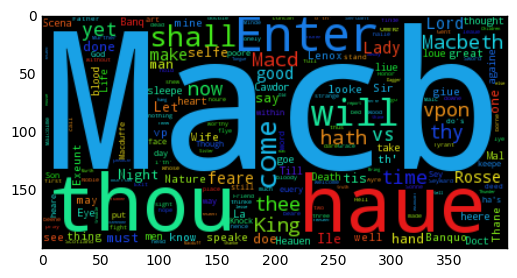

In [9]:
import wordcloud
wc = wordcloud.WordCloud()
img = wc.generate_from_text(raw_text)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img)
plt.show()